In [15]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [16]:
# Load the training and testing sets from a pickle file
with open('../data/datasets.pkl', 'rb') as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

In [17]:
# Convert y_train and y_test to numpy arrays
y_train = np.array(y_train, copy=True)
y_test = np.array(y_test, copy=True)

In [18]:
# Function to plot distribution of a column using Kernel Density Estimation (KDE) plot and Q-Q plot
def plot_distribution(column, distribution='norm'):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    sns.kdeplot(column, ax=axs[0])
    stats.probplot(column, dist=distribution, plot=axs[1])
    plt.show()

In [19]:
# Define a function to plot residuals versus predicted values to check for heteroscedasticity
def residuals_v_pred(pred, res):
    plt.scatter(pred, res)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Predicted Values')
    plt.axhline(y=0, color='r', linestyle='-')  # Add horizontal line at y=0 for reference
    plt.show()

## Linear Regression

In [20]:
# Initialize Linear Regression model
lr = LinearRegression()

# Perform cross-validation and calculate negative mean squared error scores
cv_scores = cross_val_score(lr, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [-0.00721305 -0.00783295 -0.00762668]
Average cross-validation score: -0.007557563608906067


In [21]:
# Initialize Linear Regression model, fit it to the training data, predict win percentages for test data, and calculate MSE
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r_squared)

MSE: 0.006267678823983893
R-squared: 0.445717481955748


In [22]:
residuals = y_test - y_pred

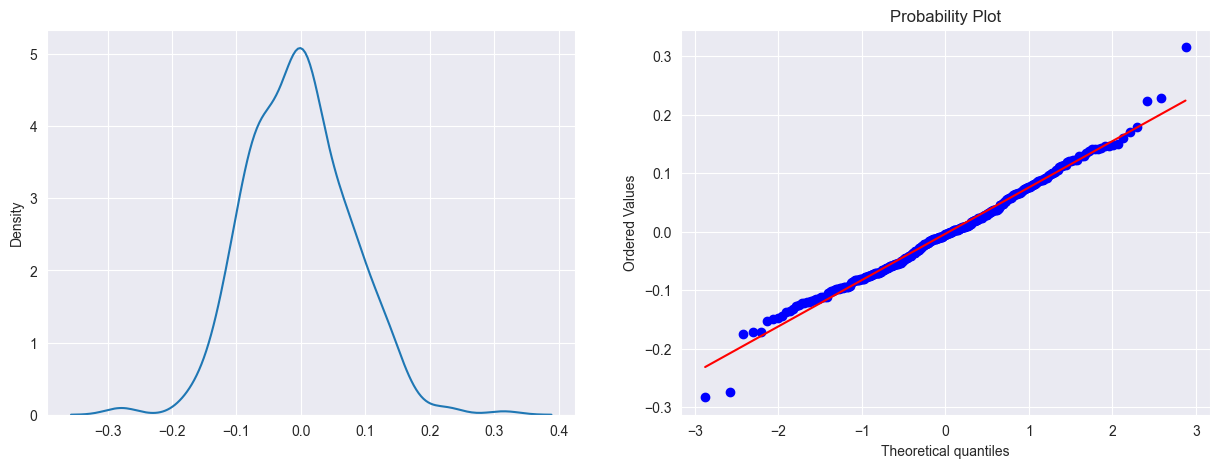

In [23]:
plot_distribution(residuals)

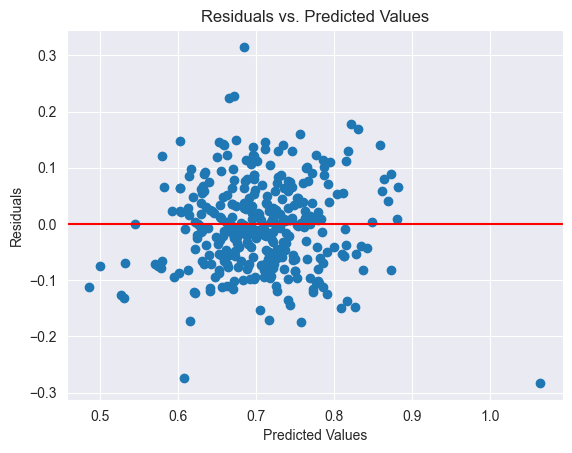

In [24]:
residuals_v_pred(y_pred, residuals)

## XGBoost

In [25]:
xgb = XGBRegressor()

params = {
    'n_estimators': (100, 800, 50),
    'max_depth': range(3, 10),
    'learning_rate': (0.1, 0.5, 0.1),
    'reg_lambda': (0.5, 0.9, 0.1)
}


grid_search = GridSearchCV(xgb, param_grid=params, cv=4, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'reg_lambda': 0.9}
Best score: -0.00540606081029576


In [26]:
xgb_model = XGBRegressor(learning_rate=0.1, n_estimators=80, max_depth=5)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r_squared_xgb = r2_score(y_test, y_pred_xgb)
print("MSE:", mse_xgb)
print("R-squared:", r_squared_xgb)

MSE: 0.004829810233321846
R-squared: 0.5728754690560371


In [27]:
residuals_xgb = y_test - y_pred_xgb

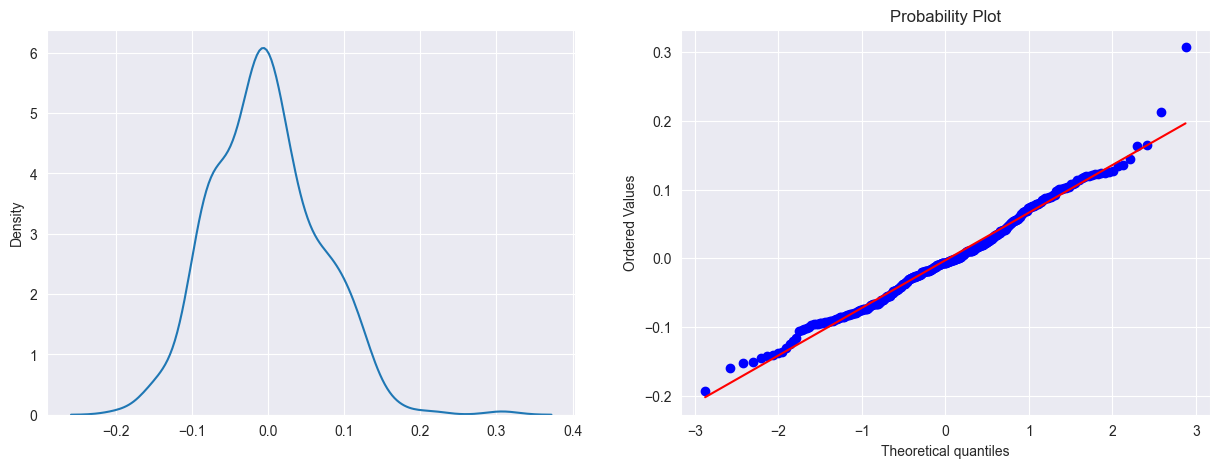

In [28]:
plot_distribution(residuals_xgb)